In [ ]:
/content/drive/MyDrive/sample_data1.xlsx

#TASK1


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Create or load DataFrame
# Replace this with your actual data loading step
df = pd.read_excel('/content/drive/MyDrive/sample_data1.xlsx')
df = pd.DataFrame({'Salary': [30000, 32000, 35000, 500000, 33000, 36000, 34000]})





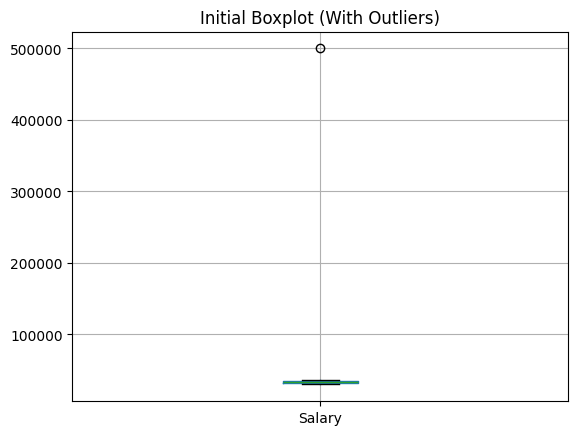

In [9]:
# Initial boxplot
df.boxplot(column='Salary')
plt.title("Initial Boxplot (With Outliers)")
plt.show()


In [11]:
# Calculate Q1 and Q3
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
print("Q1:",Q1)
print("Q3:"Q3)

# Compute IQR
IQR = Q3 - Q1
print("IQR:"IQR)

# Determine lower and upper extreme
Lower_extreme = Q1 - 1.5 * IQR
Upper_extreme = Q3 + 1.5 * IQR
print("Lower Extreme:", Lower_extreme)
print("Upper Extreme:", Upper_extreme)

# Identify outliers
df_Outlier = df[(df['Salary'] < Lower_extreme) | (df['Salary'] > Upper_extreme)]
print("\nOutliers:\n", df_Outlier)

# Remove outliers
df_no_Outlier = df[(df['Salary'] >= Lower_extreme) & (df['Salary'] <= Upper_extreme)]
print("\nCleaned Data:\n", df_no_Outlier)



32500.0
35500.0
3000.0
Lower Extreme: 28000.0
Upper Extreme: 40000.0

Outliers:
    Salary
3  500000

Cleaned Data:
    Salary
0   30000
1   32000
2   35000
4   33000
5   36000
6   34000


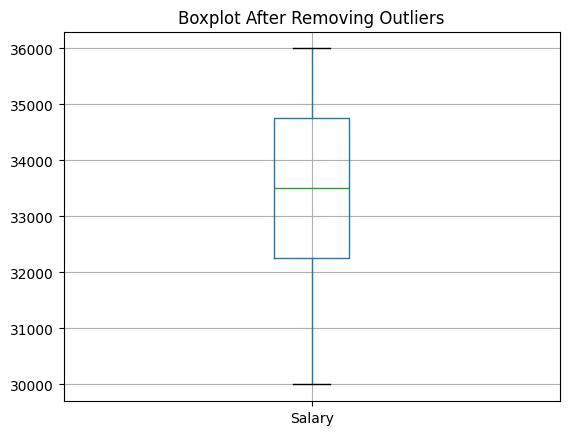

In [6]:
# Boxplot after removing outliers
df_no_Outlier.boxplot(column='Salary')
plt.title("Boxplot After Removing Outliers")
plt.show()


#TASK 2


In [15]:
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Replace with actual dataset
df = pd.read_excel('/content/drive/MyDrive/sample_data1.xlsx')

# Simulated numeric DataFrame
df = pd.DataFrame({
    'Salary': [30000, 32000, 35000, 33000, 36000],
    'Experience': [1, 2, 4, 3, 5],
    'Age': [22, 25, 30, 28, 35]
})

# Select numerical columns
num_col = df.select_dtypes(include=[np.number]).columns.tolist()
df1 = df[num_col]



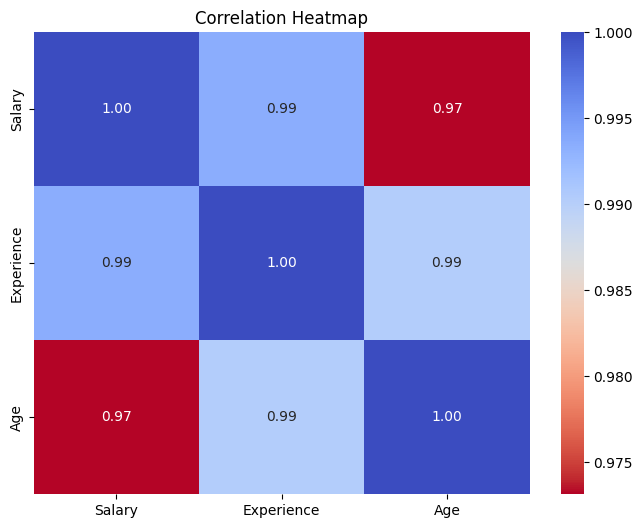

In [16]:
# Heatmap of correlations
corr = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



In [17]:
# VIF Calculation
# Drop NA and infinite values
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)



In [18]:
# Calculate VIF
VIF = pd.DataFrame()
VIF["Feature"] = df1.columns
VIF["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

print("\nVIF DataFrame:\n", VIF)



VIF DataFrame:
       Feature          VIF
0      Salary   882.095969
1  Experience   100.669518
2         Age  1500.214032
